In [1]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 320.4MB 55kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [2]:
# Import all modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import tensorflow as tf

In [3]:
# Loading the CIFAR-10 datasets
data=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [8]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#print(x_train.shape[1:])

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)
(32, 32, 3)


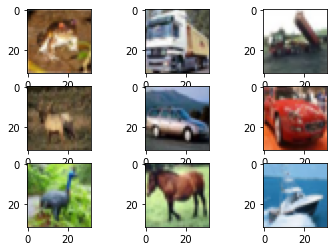

In [14]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])

In [5]:
# use a one hot encoding for each class thereby transforming the integer into a 10 element binary vector this is achieved by using to_categorical() utlis function.
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train, num_classes=10, dtype='float32') #num_classes – number of cifar-10 dataset classes
y_test=np_utils.to_categorical(y_test, num_classes=10, dtype='float32')
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [6]:
# Convert and pre-processing
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [15]:
#5th question-CNN model
#CNN apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which can be used for classification
# Dropout is a regularization method, where the layer randomly replaces a proportion of its weights to zero for each training sample.
#Activation layers,introduce non-linear properties to the model
#Pooling layers,reduce the dimensionality of the training data/features
#Dense (fully connected) layers, performs classification on the features extracted by the convolutional layers and downsampled by the pooling layers. Every node in the layer is connected to every node in the preceding layer.
from keras.models import Sequential
from keras.layers import Conv2D, Dropout
from keras.layers import Dense, Activation, MaxPooling2D
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(516, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)         

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [19]:
 history=model.fit(x_train,y_train,batch_size=5000, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
10/10 [==============================] - 1s 140ms/step - loss: 1.1094 - accuracy: 0.6120 - val_loss: 1.1022 - val_accuracy: 0.6162
Epoch 2/20
10/10 [==============================] - 1s 119ms/step - loss: 1.0624 - accuracy: 0.6270 - val_loss: 1.2309 - val_accuracy: 0.5803
Epoch 3/20
10/10 [==============================] - 1s 119ms/step - loss: 1.0910 - accuracy: 0.6192 - val_loss: 1.0636 - val_accuracy: 0.6252
Epoch 4/20
10/10 [==============================] - 1s 118ms/step - loss: 1.0567 - accuracy: 0.6342 - val_loss: 1.1854 - val_accuracy: 0.5914
Epoch 5/20
10/10 [==============================] - 1s 119ms/step - loss: 1.0451 - accuracy: 0.6388 - val_loss: 1.0440 - val_accuracy: 0.6409
Epoch 6/20
10/10 [==============================] - 1s 120ms/step - loss: 1.0554 - accuracy: 0.6300 - val_loss: 1.0475 - val_accuracy: 0.6310
Epoch 7/20
10/10 [==============================] - 1s 121ms/step - loss: 0.9686 - accuracy: 0.6607 - val_loss: 1.0731 - val_accuracy: 0.6324
Epoch 

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

313/313 - 0s
[[771  12  16   4  15   2   8  14 128  30]
 [ 36 740   5   4   3   1   2   5  84 120]
 [101   8 503  22 155  28  54  47  57  25]
 [ 57  24  82 318 129  61 121  52  90  66]
 [ 52   2  53  18 696   6  52  75  41   5]
 [ 52   7  81 121  93 360  77  97  75  37]
 [ 22   7  33  25  93  11 737  16  36  20]
 [ 34   3  28  11  67  24  15 763  26  29]
 [ 45  19   3   1   6   2   5   5 893  21]
 [ 53  86   3   5   6   2   7  13  89 736]]


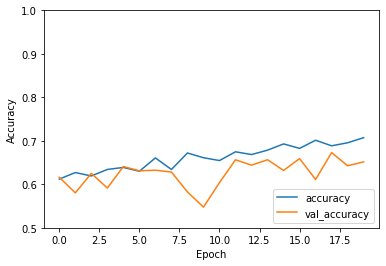

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
train_loss , train_acc = model.evaluate(x_train,y_train)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.7906 - accuracy: 0.7315
